**Decision Tree Properties**
* Decision Tree Require very less data preparation.
* They don't require feature scaling or centering at all.
* Although Decision Trees are sensitive to the rotation of Training Set.
* Decision Tree is based on Greedy search algorithm.

**Decision Tree Algorithms**
* Sckit-Learn Uses the CART Algorithm.
* CART algorithm produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers).
* However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

### Training and Visualising a Decision Tree

In [1]:
import os

In [2]:
# Training a decision Tree classifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [3]:
# Visualise a decision Tree
from sklearn.tree import export_graphviz

# def image_path(fig_id):
#     return os.path.join(IMAGES_PATH, fig_id)

export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=iris.feature_names[2:],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )

In [4]:
!pip install graphviz

In [5]:
# import graphviz
# from IPython.display import display

# with open("C:\\Users\\ShefaliGupta\\Downloads\\iris_tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [6]:
# The dot command was not being installed in the windows PC.
# Therefore I used an online converter to convert dot file to png file
# And loaded the png file.

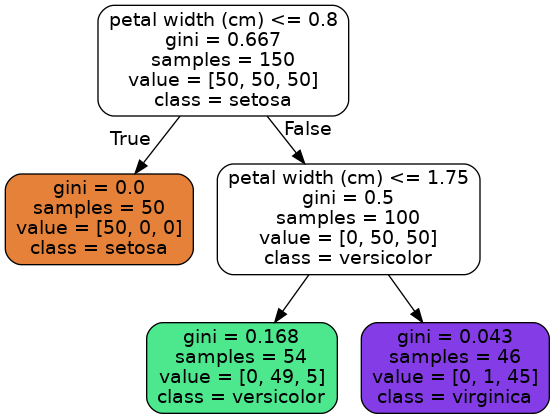

In [7]:
from IPython import display
display.Image("iris-tree.png")

**Gini-impurity**
*  A node’s gini attribute measures its impur‐ity: a node is “pure” (gini=0) if all training instances it applies to belong to   the same class. 
*  In above diagram the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0.
*  The depth-2 left node has a gini score equal to 1 – (0/54)2– (49/54)2– (5/54)2 ≈ 0.168.

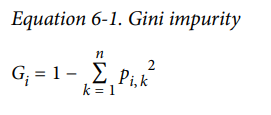


**Entropy**
*  The concept of entropy originated in thermodynamics as a measure of molecular disorder:entropy approaches zero when molecules are still and well ordered.
*  Shannon’s information theory: The average information content of a message:4. Entropy is zero when all messages are identical. 
*  A set’s entropy is zero when it contains instances of only one class.
*  the depth-2 left node in Figure 6-1 has an entropy equal to
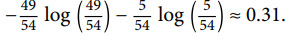

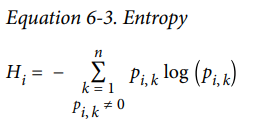

### Gini Impurity or Entropy?

* The truth is, most of the time it does not make a big difference: they lead to similar trees. 
* Gini impurity is slightly faster to compute, so it is a good default.


### Estimating Probabilities

* For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide.
* The corre‐sponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for   Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54),and 9.3% for Iris-Virginica (5/54).
* And of course if you ask it to predict the class, it should output Iris-Versicolor (class 1) since it has the highest    probability. 

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])


array([1])

### The CART Training Algorithm
* Cost Function for Classification
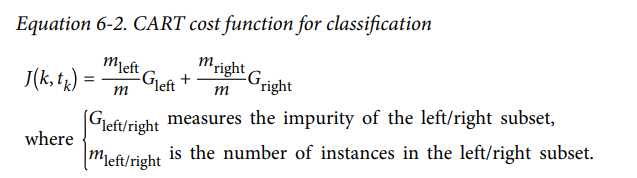

* Cost Function for Regression
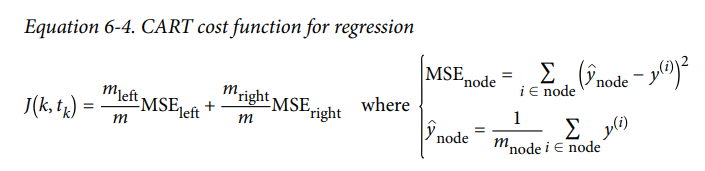

**Greedy Algorithm**
* CART algorithm is a greedy algorithm: it greed‐ily searches for an optimum split at the top level, then repeats the process at each level.
*  It does not check whether or not the split will lead to the lowest possible impurity several levels down.
* A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

**CART Algorithm**
* The algo‐rithm first splits the training set in two subsets using a single feature k and a thres‐hold tk(e.g., “petal length ≤ 2.45 cm”).
*  How does it choose k and tk?
*  It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).
* Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively
* It stops recursing if it has reached max depth or if it cannot find a split that will reduce impurity.

### Computational Complexity

### Regularisation Hyperparameter
 1.  **max_depth**
 2.  **min_samples_split**: the minimum number of samples a node must have before it can be split.
 3.  **min_samples_leaf**: the minimum num‐ber of samples a leaf node must have.
 4. **min_weight_fraction_leaf**: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
 5.  **max_leaf_nodes**:maximum number of leaf nodes
 6. **max_features**:maximum number of features that are evaluated for splitting at each node.

**Prunning Decision Tree**
* Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting) unnecessary nodes.
* A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant.
* Stan‐dard statistical tests, such as the χ2 test, are used.
*  If this probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. 

### Regression


In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

### Instability

* First, as you may have noticed, Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an   axis),which makes them sensitive to training set rotation.
* One way to limit this prob‐lem is to use PCA (see Chapter 8), which often results in a better orientation of the
  training data
* For example, Figure 6-7 shows a simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
    on the right, after the dataset is rotated by 45°, the decision boundary looks unneces‐sarily convoluted. 
    
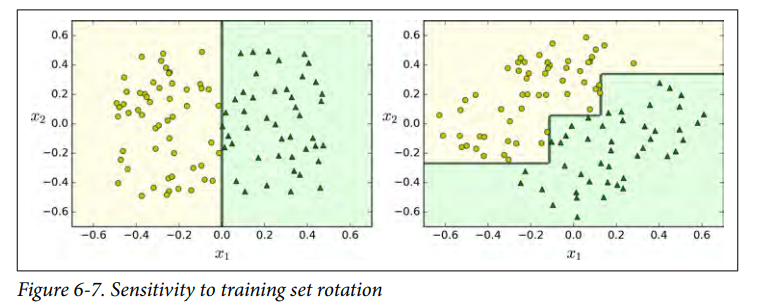